# Footprints of other Galactic Plane Surveys

A range of other surveys have or will observe some or all of the Galactic Plane, and it is valuable to take these regions into account when designing the Roman Plane survey.  This maximizes the science return from all of the dataset by providing complementary wavelength coverage as well as higher spatial resolution imaging for deblending. 

The goal of this notebook is to explore the footprints of these surveys.  

In [10]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import survey_footprints
import config_utils
from astropy import units as u 
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import numpy as np
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord, ICRS
%matplotlib inline
import healpy as hp

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

# Load configuration 
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

The footprints of other surveys are defined in JSON format as HEALpixel maps in the config directory.  They can be loaded using the convenience functions provided:

In [2]:
survey_regions = survey_footprints.load_survey_footprints(sim_config, root_dir)
survey_regions

{'rubin_galactic_plane': array([0., 0., 0., ..., 0., 0., 0.]),
 'DECaPS2': array([0., 0., 0., ..., 0., 0., 0.])}

We also want to load the BlackCat catalog...

In [3]:
blackcats = survey_footprints.load_catalog(path.join(root_dir, 'config'), 'blackcat_catalog.csv')
blackcats

[{'pointing': [321.8163989, -0.00332943, 0.1]},
 {'pointing': [8.6416052, 10.25479693, 0.1]},
 {'pointing': [1.1471843, -3.727514, 0.1]},
 {'pointing': [151.16113, 5.29973, 0.1]},
 {'pointing': [251.532037, -20.67473903, 0.1]},
 {'pointing': [309.2640654, -1.10297116, 0.1]},
 {'pointing': [351.9548777, -0.96630145, 0.1]},
 {'pointing': [8.769557, -1.98090632, 0.1]},
 {'pointing': [336.2881394, 0.31248069, 0.1]},
 {'pointing': [35.8535506, 10.1591562, 0.1]},
 {'pointing': [20.1116048, 3.94826128, 0.1]},
 {'pointing': [343.2512784, 0.05342834, 0.1]},
 {'pointing': [323.7240835, -1.12885997, 0.1]},
 {'pointing': [359.6444754, -0.17656165, 0.1]},
 {'pointing': [358.7115137, -0.65799919, 0.1]},
 {'pointing': [8.1151012, -6.5448459, 0.1]},
 {'pointing': [3.6476003, 0.10353821, 0.1]},
 {'pointing': [2.1108255, 1.40326586, 0.1]},
 {'pointing': [29.9025737, -6.84402939, 0.1]},
 {'pointing': [304.2379729, -7.61898877, 0.1]},
 {'pointing': [13.9456207, -5.35432173, 0.1]},
 {'pointing': [325.08486

For the purposes of plotting, we first co-add the HEALpixel arrays into a single sky map, where value represents the number of surveys that include each HEALpixel.  

In [4]:
NPIX = hp.nside2npix(sim_config['NSIDE'])
all_survey_footprint = np.zeros(NPIX)
for name, arr in survey_regions.items():
    all_survey_footprint += arr

### Plot survey regions

Here we visualize the footprints of different Galactic Plane surveys, using different tools.

Firstly, the healpy package provides a Mollweide plotting function which is widely used by Rubin.  

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_78565/466754956.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

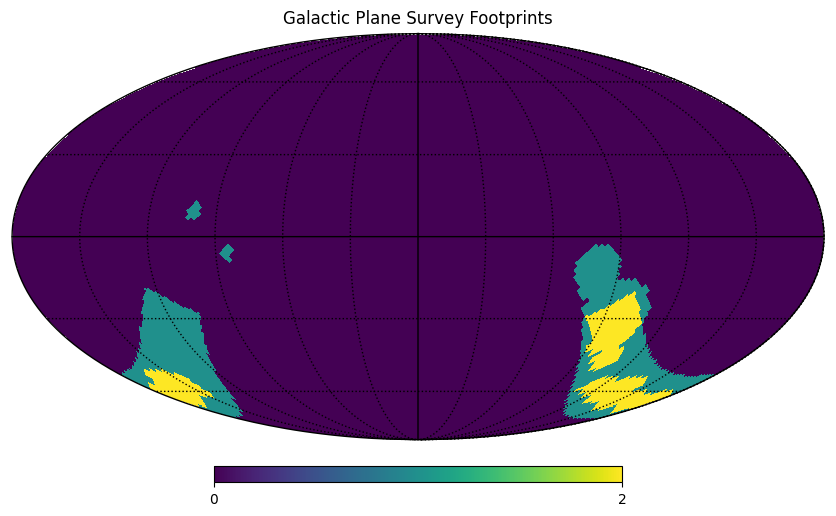

In [5]:
fig = plt.figure(1,(10,10))
hp.mollview(all_survey_footprint, title='Galactic Plane Survey Footprints')
hp.graticule()
plt.tight_layout()

Alternatively there is the mw_plot package which provides tools to plot survey regions over graphics of the Galaxy in the optical or NIR.
This package also makes it easier to overplot point sources.

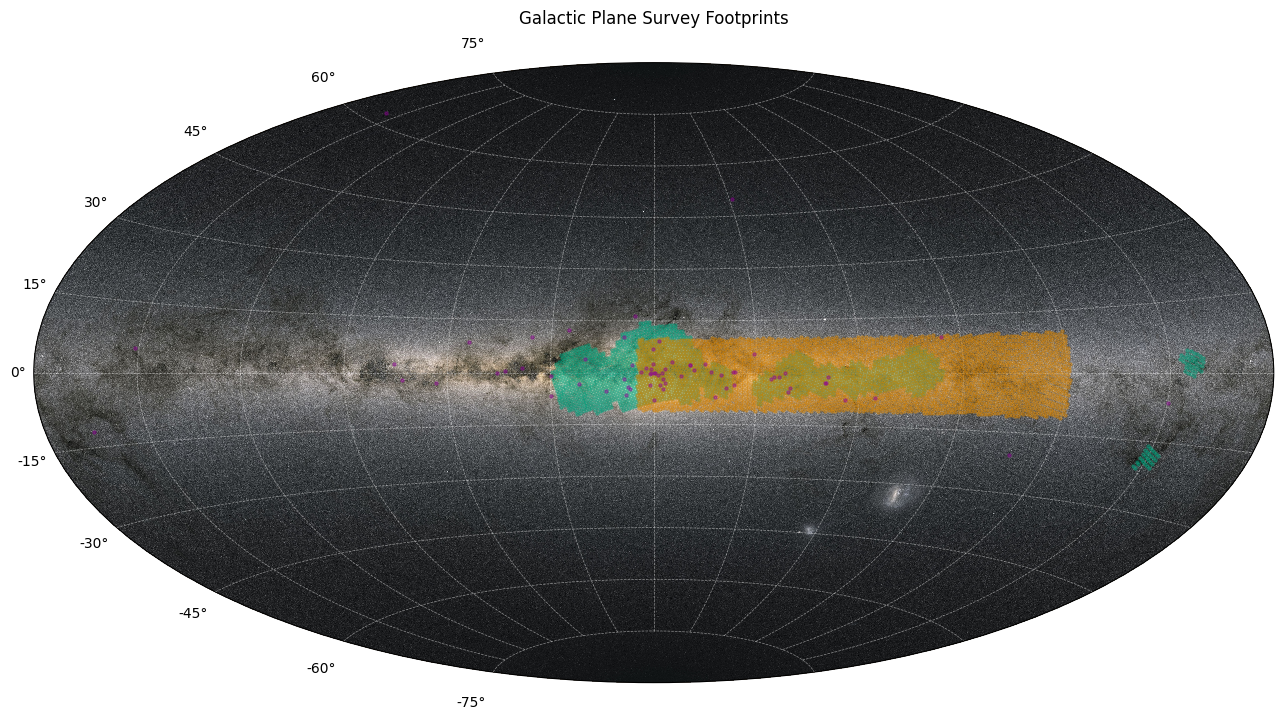

In [12]:
plot_colors = {
    'rubin_galactic_plane': '#01a27d',
     'DECaPS2': '#d68302',
    'blackcats': '#8d0194'
}

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='optical', figsize=(16,10))
mw1.title = 'Galactic Plane Survey Footprints'
proj = HEALPix(nside=64, order='ring', frame='icrs')
for name, skymap in survey_regions.items():
    pixels = np.where(skymap > 0)[0]
    s = proj.healpix_to_skycoord(pixels)
    mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c=plot_colors[name], s=5, alpha=0.4)

for source in blackcats:
    s = SkyCoord(source['pointing'][0], source['pointing'][1], frame='galactic', unit=(u.deg, u.deg))
    s = s.transform_to(ICRS)
    mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c=plot_colors['blackcats'], s=5, alpha=0.4)